In [1]:
import sys
import os
# Ruta absoluta a tu proyecto principal
ruta_base = "/home/aarriero/Documents/Angela_cmb/four_year/"
# Agregar al sys.path (al inicio para prioridad)
sys.path.insert(0, ruta_base)
#print(ruta_base)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

sys.path.append(os.path.join(ruta_base, "general_documents/definitions_files"))
from main_TMS_paper import C_Delta_T
from matplotlib.ticker import FuncFormatter

/home/aarriero/Documents/Angela_cmb/four_year/
Ruta completa del archivo: /home/aarriero/Documents/Angela_cmb/four_year/general_documents/data_files/input_params_simulation_V1_def.toml
Archivo cargado correctamente


/home/aarriero/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def delta_T(array1_tiempo,t_sky_r,t_load_r,n):
    

    total_BEM_atmos_cmb,total_I1_BEM_atmos_cmb,total_I2_BEM_atmos_cmb,freq_spec,Tlss_resta,y_ajustada_append,T_sky_bet_total,T_load_bet_total=C_Delta_T(array1_tiempo,t_sky_r,t_load_r,n)
    
    return total_BEM_atmos_cmb,total_I1_BEM_atmos_cmb,total_I2_BEM_atmos_cmb,freq_spec,Tlss_resta,y_ajustada_append,T_sky_bet_total,T_load_bet_total

In [3]:
#"""""
array1_tiempo = np.array(1)
t_sky_r=8*np.ones(1000)
t_load_r=8*np.ones(1000)

#"""""

In [4]:
A0,B0,C0,D0,E0,F0,P0,Q0=delta_T(array1_tiempo,t_sky_r,t_load_r,np.size(t_load_r))

max:L W -0.06405931114258878
min:L W -0.05703240144570519
mean:L W -0.060544435096763646
max:L IR -0.013898117752413706
min:L IR -0.006951837749073006
mean:L IR -0.010423588981061946
max:L fh -0.11422237715167706
min:L fh -0.1071138995465595
mean:L fh -0.11066668396590805
max:L omt -0.3650665694231193
min:L omt -0.3575357905118142
mean:L omt -0.3612995476469369
max:L HYB -0.11422237715167706
min:L HYB -0.1071138995465595
mean:L hyb -0.11066668396590805


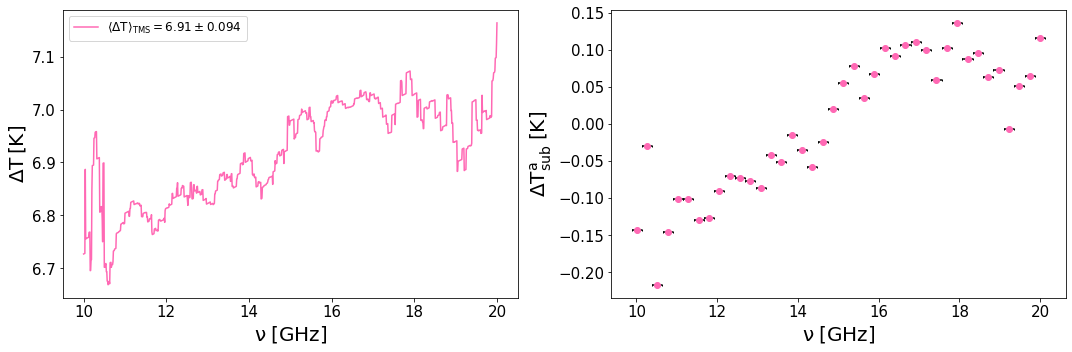

In [6]:
BEM_plot=A0[0]
new_freq=D0[0]*1e9
band_pass_prom_BEM=[]
size_arr_freq=int((new_freq[np.size(new_freq)-1]-new_freq[0])/250e6)
index_band_pass=[]
sub_band_def=[]

for j in range(size_arr_freq):
    x = new_freq[0]+(240e6*j)+(j*1e7)
    x_f = x+240e6
    sub_band_def.append(np.array([x,x_f]))
    #print('inicio',x)
    #print('fin',x_f)
    indices = np.where((new_freq >= x) & (new_freq <= x_f))[0]
    index_band_pass.append(indices)
    band_pass_prom_BEM.append(np.mean(BEM_plot[indices]))

mean_BEM=np.mean(BEM_plot)

freq_spec=D0[0]
min_arr=((freq_spec[1]-freq_spec[0])/2)+freq_spec[0]
max_arr=freq_spec[np.size(freq_spec)-1]-((freq_spec[1]-freq_spec[0])/2)
arra_freq_new=np.linspace(min_arr,max_arr,40)
x = arra_freq_new
TEST = arra_freq_new 
y2= band_pass_prom_BEM-(mean_BEM*np.ones(np.size(band_pass_prom_BEM)))
#error_horizontal = ((arr22[1][1]-arr22[1][0])/1e9 )+0.01
error_horizontal =0.125
    
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# ========================== PLOT 1 ===============================
axs[0].plot(
    freq_spec, 
    BEM_plot,
    color='hotpink',
    label=r'$\rm \langle \Delta T \rangle_{\rm TMS} = %.2f \pm %.3f$' % (np.mean(BEM_plot), np.std(BEM_plot)))

axs[0].set_xlabel(r'$\rm \nu\;[\rm GHz]$', fontsize=20)
axs[0].set_ylabel(r'$\rm \Delta T\, [\rm K]$', fontsize=20)
axs[0].tick_params(labelsize=15)
axs[0].legend(loc='best', fontsize=12)
#axs[0].grid(alpha=0.3)

# ========================== PLOT 2 ===============================
axs[1].errorbar(x, y2, xerr=error_horizontal, fmt='o',color='hotpink',ecolor='k',capsize=1)
axs[1].set_xlabel(r'$\rm \nu\;[\rm GHz]$', fontsize=20)
axs[1].set_ylabel(r'$\rm \Delta T^a_{\rm sub}\;[\rm K]$', fontsize=20)
axs[1].tick_params(labelsize=15)
#axs[1].legend(loc='best', fontsize=10)
#axs[1].grid(alpha=0.3)
plt.tight_layout()

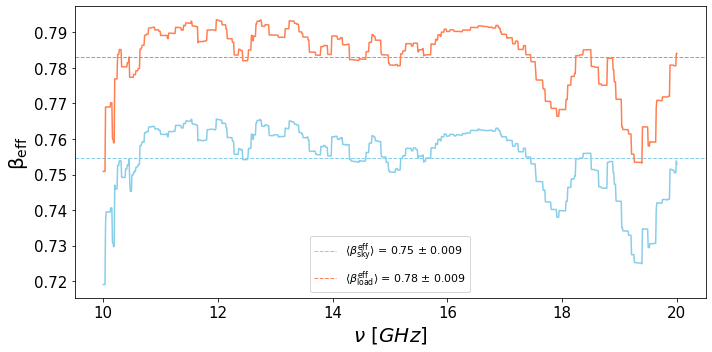

In [7]:
mean_bskyA1=np.mean(P0)
mean_bloadA1=np.mean(Q0)
desv_Tsky=np.std(P0)
desv_Tload=np.std(Q0)

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(D0[0],P0,color='skyblue',linestyle='solid')
plt.axhline(mean_bskyA1, color = 'skyblue', linewidth = 1,label=r'$\langle \beta_{\rm sky}^{\rm eff} \rangle$ = %.2f $\pm$ %.3f' % (mean_bskyA1, desv_Tsky),linestyle='--')
ax1.plot(D0[0],Q0,color='coral',linestyle='solid')
plt.axhline(mean_bloadA1, color = 'coral', linewidth = 1,label=r'$ \langle \beta_{\rm load}^{\rm eff} \rangle$ = %.2f $\pm$ %.3f' % (mean_bloadA1,desv_Tload),linestyle='--')
ax1.tick_params(labelsize=15,axis='y',which='both')
ax1.set_ylabel(r'$\rm \beta_{eff}$',fontsize=20)
ax1.set_xlabel(r'$\nu \ [GHz]$',fontsize=20)
ax1.legend(loc='best', fontsize=11)
ax1.tick_params(labelsize=15,axis='both',which='both')
plt.tight_layout()

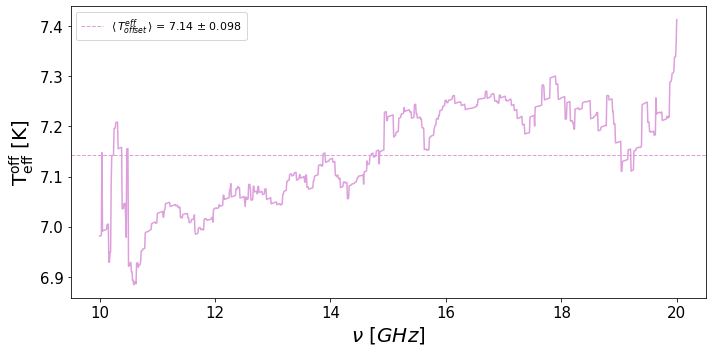

In [8]:
resta_loss=E0[0]
resta_loss_mean=np.mean(resta_loss)
resta_loss_desv=np.std(resta_loss)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(D0[0],resta_loss,linestyle='-',color='plum')

plt.axhline(resta_loss_mean, color = "plum", linewidth = 1,label=r'$ \langle \, T^{eff}_{offset} \, \rangle $ = %.2f $\pm$ %.3f' % (resta_loss_mean, resta_loss_desv),linestyle='--')


plt.xlabel(r'$\nu \ [GHz]$',fontsize=20)
plt.ylabel(r'$ \rm T^{off}_{eff} \ [K]$', fontsize=20)
plt.legend(loc='best', fontsize=11)
plt.tick_params(labelsize=15,axis='both',which='both')
plt.tight_layout()